In [3]:
import pandas as pd

In [4]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [7]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [8]:
#from sklearn.preprocessing import OneHotEncoder

titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [9]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype=int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
#Define the independent variables X and the independent variable y
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X.shape

(891, 11)

In [11]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [14]:
#Train a decision tree and make a plot of it
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

unpruned = DecisionTreeClassifier(random_state=14)

#Train the decision tree

unpruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=14)

In [15]:
#Predict the response for the test dataset
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)

#Print out the Model accuracy n both the test and train data
from sklearn.metrics import accuracy_score, classification_report

print("The accuracy of the train model is: ", accuracy_score(y_train, y_train_pred))
print("The accuracy of the test model is: ", accuracy_score(y_test, y_test_pred))
print("The maximum depth of the model is: ", unpruned.tree_.max_depth)

The accuracy of the train model is:  0.9983948635634029
The accuracy of the test model is:  0.7425373134328358
The maximum depth of the model is:  19


Text(0.5, 1.0, 'Test Confusion Matrix')

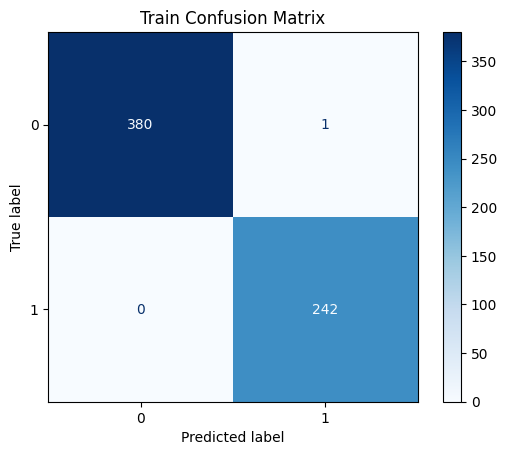

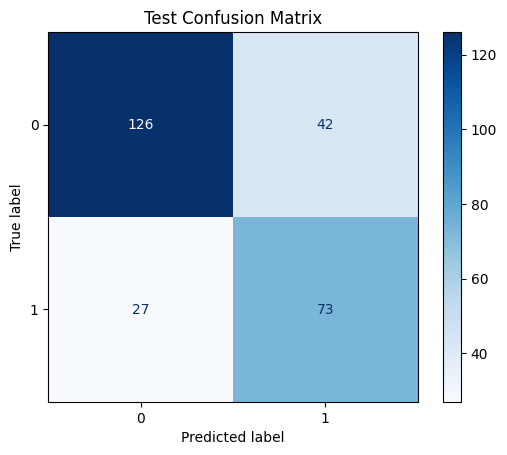

In [16]:
#Plot the confusion matrix and the tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn import tree
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')


cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

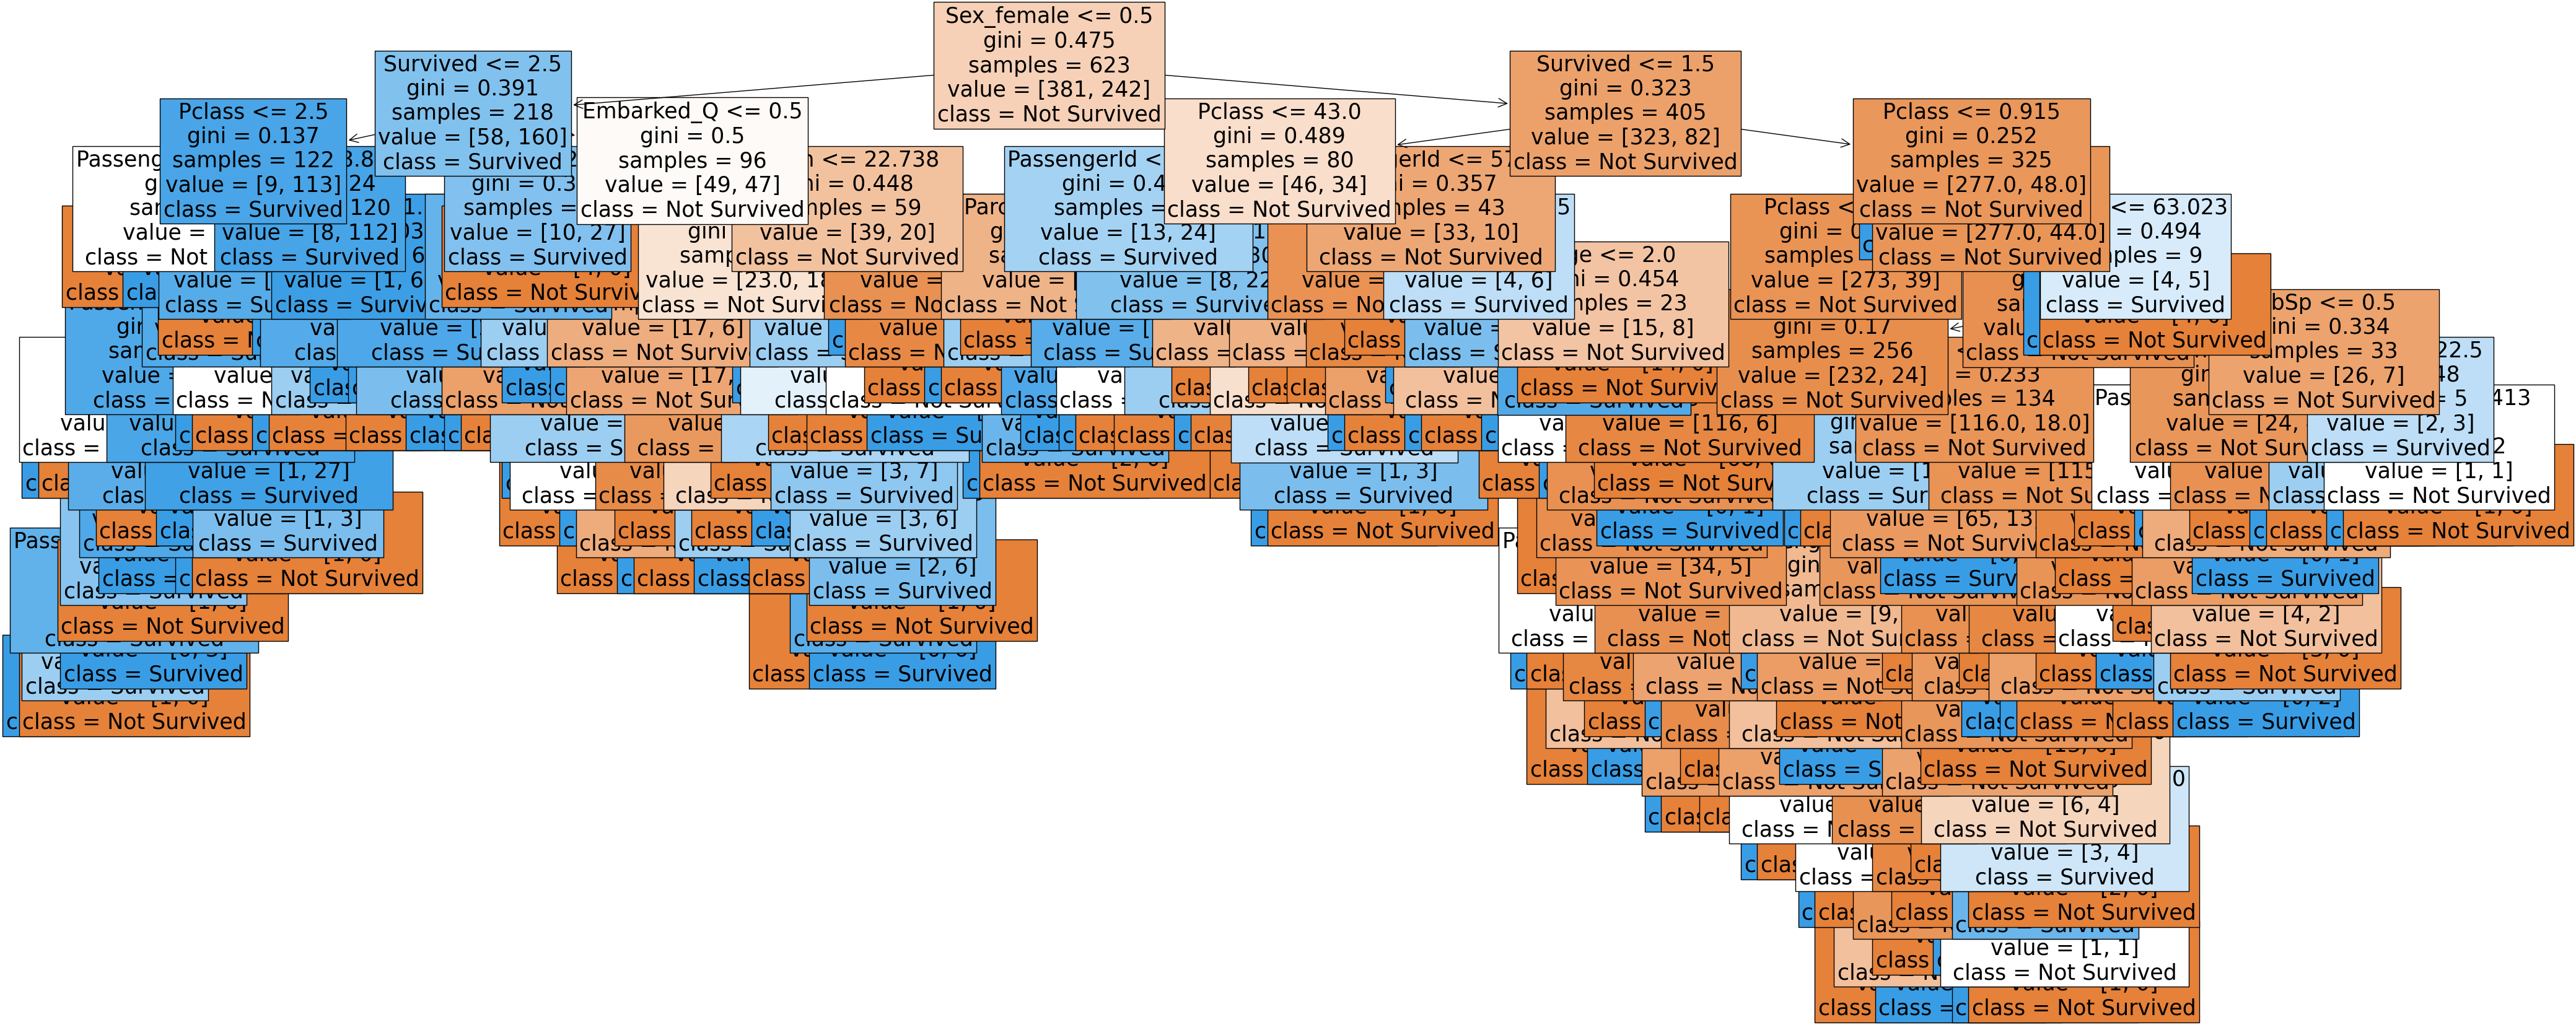

In [37]:
#Plot the tree
plt.figure(figsize=(50, 20))
features = titanic_df.columns
classes = ['Not Survived', 'Survived']
tree.plot_tree(unpruned, feature_names=features, class_names=classes, filled=True, fontsize=25)
plt.show()



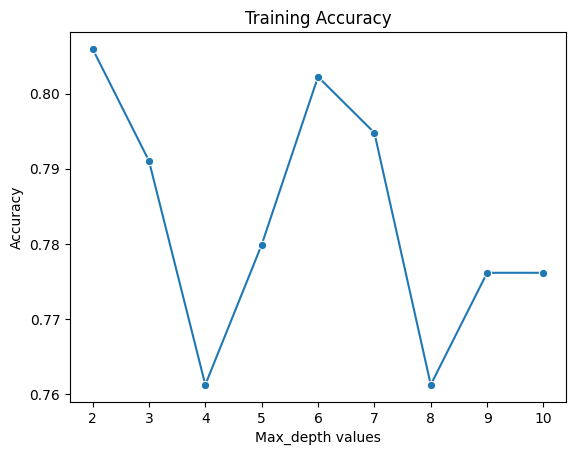

In [17]:
#Build the model with different values of max_depth (2 - 10)
#So this is the process of trying to prune the model
import seaborn as sns


pruned_depth = range(2, 11)
pruned_score = []
for d in pruned_depth:
    clf = DecisionTreeClassifier(max_depth=d, random_state=14)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pruned_score.append(score)

sns.lineplot(x=pruned_depth, y=pruned_score, marker='o')
plt.xlabel('Max_depth values')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [18]:
#Printing the best depth
import numpy as np


best_depth = pruned_depth[np.argmax(pruned_score)]
print("The best depth of the pruned tree is: ", best_depth)

The best depth of the pruned tree is:  2


In [20]:
#Now let us estimate the acuracy of the pruned tre on the test data
pruned = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=14, min_samples_leaf=2)

#Train the Decision Tree Classifier
pruned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2,
                       random_state=14)

In [21]:
#Predict the response of the test dataset
y_test_pred = pruned.predict(X_test)

#Print the model accuracy
print('The Accuracy of the Training model is: ', accuracy_score(y_train, y_train_pred))
print('The Accuracy of the Testing model is: ', accuracy_score(y_test, y_test_pred))

The Accuracy of the Training model is:  0.9983948635634029
The Accuracy of the Testing model is:  0.8059701492537313


In [1]:
#Create a bagged, random forest, and boosted tree for the titanic dataset 
#Do that in the same way that I created the regular classification tree


In [22]:
#Features and Target
feature_names = X.columns
feature_names


Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
#Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

rf = RandomForestClassifier(random_state=14)


#Training the random forest classifier
rf.fit(X_train, y_train)


#Predict the response of the test dataset for the models
y_test_pred_rf = rf.predict(X_test)

print('The Testing Accuracy for the Random Forest model: ', accuracy_score(y_test, y_test_pred_rf))

The Testing Accuracy for the Random Forest model:  0.8097014925373134


In [25]:
#Importatnt Scores: Feature importance
#Gini importance and visulaisation

importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
5,Fare,0.184652
2,Age,0.182914
0,PassengerId,0.180720
6,Sex_female,0.131542
7,Sex_male,0.115476
1,Pclass,0.082444
3,SibSp,0.043131
4,Parch,0.037624
10,Embarked_S,0.017678
8,Embarked_C,0.017274


In [26]:
#From the Random Forest above, the most important feature that contributes the most to predicting survival was:

#Fare with Gini importance of 0.184652


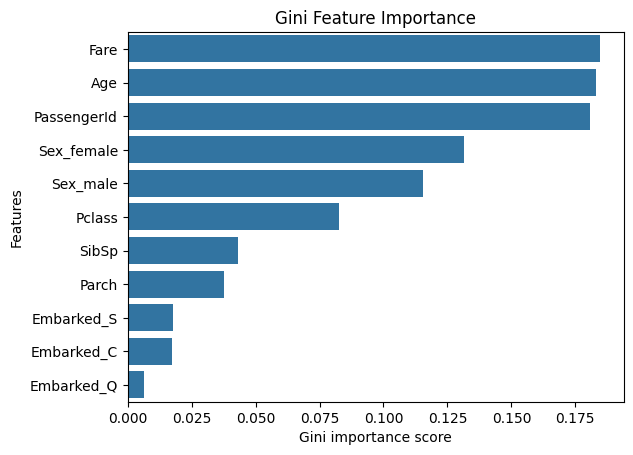

In [27]:
#Creating a seaborn bar plot
sns.barplot(x=feature_imp_df['Gini Importance'], y=feature_imp_df['Feature'], data=feature_imp_df)
plt.title('Gini Feature Importance')
plt.xlabel('Gini importance score')
plt.ylabel('Features')
plt.show()

In [29]:
#Drp the least important feature  from X_train and X_test
X_train_gini = X_train.drop(['Embarked_Q'], axis=1)
X_test_gini = X_test.drop(['Embarked_Q'], axis=1)


#Create a Random Forest Classifier
rf_gini = RandomForestClassifier(random_state=14)

#Fit the model
rf_gini.fit(X_train_gini, y_train)


#Predict the response for the test dataset for the model
y_test_pred_rf_gini = rf_gini.predict(X_test_gini)



#Print the performance metrics
print('The Testing Accuracy for the Random Forest Model: ', accuracy_score(y_test, y_test_pred_rf))
print('The Testing Accuracy for the Random Forest model with Gini Importance: ', accuracy_score(y_test, y_test_pred_rf_gini))

The Testing Accuracy for the Random Forest Model:  0.8097014925373134
The Testing Accuracy for the Random Forest model with Gini Importance:  0.7985074626865671


In [31]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 5, 10, 20, 50],
    'n_estimators': [10, 15, 20, 30, 50, 100]
}

#Instantiate the Grid Search Model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=14), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'n_estimators': [10, 15, 20, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [32]:
#Check the best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8282775020678247


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=20,
                       random_state=14)

In [33]:
#Compare Models
base = DecisionTreeClassifier(max_depth=None, random_state=14)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=14)
rf = RandomForestClassifier(random_state=14)
rf_hp = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=20, random_state=14)


#Train the Classifiers
base.fit(X_train, y_train)
ensemble.fit(X_train, y_train)
rf.fit(X_train, y_train)
rf_hp.fit(X_train, y_train)


#Predict the response for the test dataset for the models

y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf_hp = rf_hp.predict(X_test)

#Print the Accuracy Scores for the models and compare
print('The Testing Acuuracy for the Decision Tree model: ', accuracy_score(y_test, y_test_pred_base))
print('The Testing Accuracy for the Ensemble Bagging model: ', accuracy_score(y_test, y_test_pred_ensemble))
print('The Testing Accuracy for the Random Forest Model: ', accuracy_score(y_test, y_test_pred_rf))
print('The Testing Accuracy for the Random Forest with Hyperparameters: ', accuracy_score(y_test, y_test_pred_rf_hp))

The Testing Acuuracy for the Decision Tree model:  0.7425373134328358
The Testing Accuracy for the Ensemble Bagging model:  0.8022388059701493
The Testing Accuracy for the Random Forest Model:  0.8097014925373134
The Testing Accuracy for the Random Forest with Hyperparameters:  0.7947761194029851


In [34]:
#The Random Forest Model Performed Best in this case with the Accuracy Score of 0.809 (81% accurate)